In [1]:
%load_ext autoreload
%autoreload 2
from b2analysis import StackedHistogram, Histogram
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/06


In [34]:
signal = np.random.normal(0,2,10000)
background = np.random.normal(1,5,100000)

In [35]:
stacked_hist = StackedHistogram(0, "x")
stacked_hist.create_histogram("background", background, 0, overflow_bin=True, range=(-8,8), bins=30)
stacked_hist.create_histogram("signal", signal, 0, overflow_bin=True, range=(-8,8), bins=30)

(<Figure size 540x450 with 1 Axes>,
 <AxesSubplot: title={'left': 'Belle II', 'right': '$\\int \\mathcal{L} \\,\\mathrm{d}t=0\\,\\mathrm{fb}^{-1}$'}, xlabel='x', ylabel='events'>)

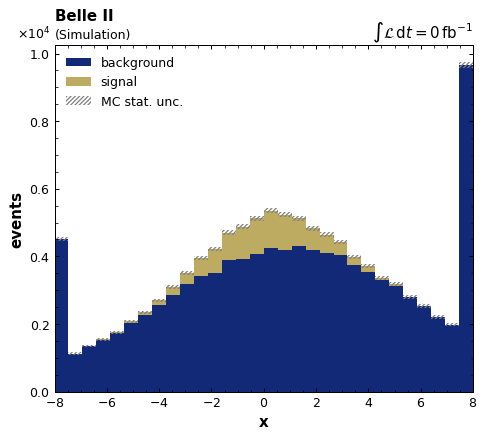

In [36]:
stacked_hist.plot()

(<Figure size 540x450 with 1 Axes>,
 <AxesSubplot: title={'left': 'Belle II', 'right': '$\\int \\mathcal{L} \\,\\mathrm{d}t=0\\,\\mathrm{fb}^{-1}$'}, xlabel='x', ylabel='events'>)

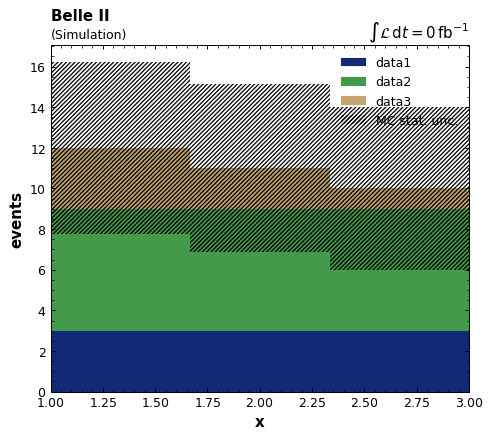

In [4]:
stacked_hist = StackedHistogram(0, "x")
stacked_hist.add_histogram(Histogram("data1", np.array([1,1,1,2,2,3]), 0, var="x", overflow_bin=True, bins=3, weights=np.array([1,1,1,3/2,3/2,3])))
stacked_hist.add_histogram(Histogram("data2", np.array([1,1,1,2,2,3]), 0, var="x", lumi_scale=2, overflow_bin=True, bins=3, weights=np.array([1,1,1,3/2,3/2,3])))
stacked_hist.add_histogram(Histogram("data3", np.array([1,1,1,2,2,3]), 0, var="x", overflow_bin=True, bins=3))

stacked_hist.plot()

## Testing Overflow Bin Entries



Histogram Object
name: hist_canvas
var: x
bins: 3
entries: 49
weights: 1.000
lumi: 0


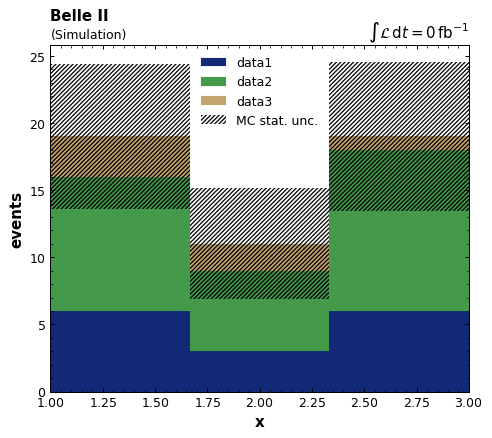

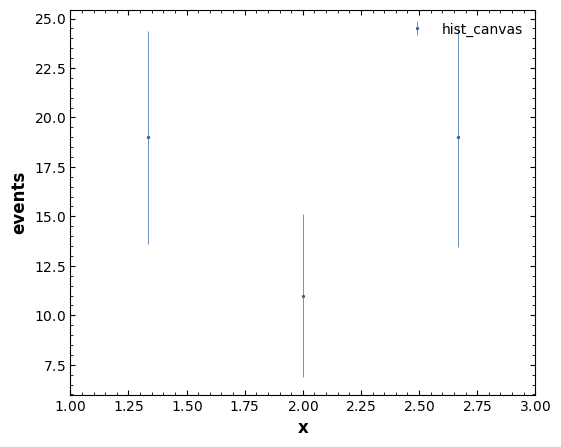

In [3]:
stacked_hist = StackedHistogram(0, "x")
stacked_hist.add_histogram(Histogram("data1", np.array([0,0,0,1,1,1,2,2,3,4,4,5]), 0, var="x", overflow_bin=True, bins=3, weights=np.array([1,1,1,1,1,1,3/2,3/2,3,1,1,1]), range=(1,3)))
stacked_hist.add_histogram(Histogram("data2", np.array([0,0, 1,1,1,2,2,3,4,4,4]), 0, var="x", lumi_scale=2, overflow_bin=True, bins=3, weights=np.array([1,1,1,1,1,3/2,3/2,3,1,1,1]), range=(1,3)))
stacked_hist.add_histogram(Histogram("data3", np.array([1,1,1,2,2,3]), 0, var="x", overflow_bin=True, bins=3, range=(1,3)))
stacked_hist.plot()
hist = stacked_hist.get_hist()
hist.plot()

assert hist.entries[0]==19, f"0. bin ({hist.entries[0]}) not matching required number of 19" 
assert hist.entries[1]==11, f"1. bin ({hist.entries[1]}) not matching required number of 11"
assert hist.entries[2]==19, f"2. bin ({hist.entries[2]}) not matching required number of 11"
print(hist)


## Reweighting

(<Figure size 540x450 with 1 Axes>,
 <AxesSubplot: title={'left': 'Belle II', 'right': '$\\int \\mathcal{L} \\,\\mathrm{d}t=20\\,\\mathrm{fb}^{-1}$'}, xlabel='x', ylabel='events'>)

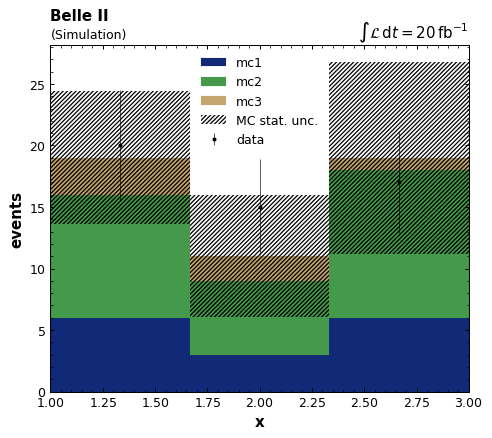

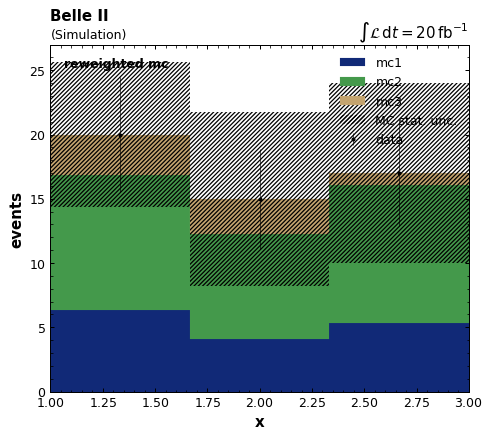

In [6]:
from b2analysis import reweight

lumi = 20

d1 = np.array([0,0,0,1,1,1,2,2,3,4,4,5])
w1 = np.array([1,1,1,1,1,1,3/2,3/2,3,1,1,1])

d2 = np.array([0,0, 1,1,1,2,2,3,4,4,4])
w2 = np.array([1,1,1,1,1,3/2,3/2,3,1,1,1])

d3 = np.array([1,1,1,2,2,3])



## Initial Stacked MC and Data Histogram
stacked_hist = StackedHistogram(lumi, "x")
stacked_hist.add_histogram(Histogram("mc1", d1, lumi, var="x", overflow_bin=True, bins=3, weights=w1, range=(1,3)))
stacked_hist.add_histogram(Histogram("mc2", d2, lumi/2, var="x", lumi_scale=2, overflow_bin=True, bins=3, weights=w2, range=(1,3)))
stacked_hist.add_histogram(Histogram("mc3", d3, lumi, var="x", overflow_bin=True, bins=3, range=(1,3)))
stacked_hist.add_data_histogram(Histogram("data", np.array([20,15,17]), err=np.sqrt([20,15,17]), lumi=lumi, bins=stacked_hist.bin_edges, is_hist=True))
stacked_hist.plot()
mc = stacked_hist.get_hist()
data = stacked_hist.get_data_hist()

# get the weights from mc/data discrepancy
w = data/mc


assert mc.entries[0]==19, f"0. bin ({mc.entries[0]}) not matching required number of 19" 
assert mc.entries[1]==11, f"1. bin ({mc.entries[1]}) not matching required number of 11"
assert mc.entries[2]==19, f"2. bin ({mc.entries[2]}) not matching required number of 11"

w1 = reweight(d1,mc.bin_edges, w, w1)
w2 = reweight(d2,mc.bin_edges, w, w2)
w3 = reweight(d3,mc.bin_edges, w)

## Reweighted Stacked MC and Data Histogram
stacked_hist = StackedHistogram(lumi, "x", additional_info="reweighted mc")
stacked_hist.add_histogram(Histogram("mc1", d1, lumi, var="x", overflow_bin=True, bins=3, weights=w1, range=(1,3)))
stacked_hist.add_histogram(Histogram("mc2", d2, lumi/2, var="x", lumi_scale=2, overflow_bin=True, bins=3, weights=w2, range=(1,3)))
stacked_hist.add_histogram(Histogram("mc3", d3, lumi, var="x", overflow_bin=True, bins=3, weights=w3, range=(1,3)))
stacked_hist.add_data_histogram(Histogram("data", np.array([20,15,17]), err=np.sqrt([20,15,17]), lumi=lumi, bins=stacked_hist.bin_edges, is_hist=True))
stacked_hist.plot()